In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/main/seminars/S02/S02-hw-dataset.csv'
data = pd.read_csv(url, sep=',')

In [4]:
data.head(41)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [5]:
data.info()
#видим что в столбце возраста есть 2 пропущенных значения, к тому же странный тип данных в виде не целого числа

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [6]:
data.describe()
# странный показатель в user_id, count - 41, но если смотреть по мин макс номерам общее число 40, возможны дублированные значения user_id
# кроме того в столбце покупок есть отрицательное значение, что то же скорее всего ошибка
# в столбце возраста указывается значение 120, что по тз сказано нереалистичным, кроме того более нереалистичными являются минимальные значения, 
# скажем возраст 5 лет

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [7]:
for i in data:
    print(i, data[i].isna().sum())
#как уже было выявлено в info в поле возраста есть две пропуска

user_id 0
age 2
country 0
purchases 0
revenue 0


In [8]:
print(data.duplicated().sum())
data[data.duplicated()]
#предположение выдвинутое в блоке с describe оправдалось, одна строка задублирована

1


,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [9]:
data[data['age'] < 10]['age'].count() + data[data['age'] > 100]['age'].count()

np.int64(2)

По итогу первичного осмотра обнаружено:
1. 2 пропуска в столбце age
2. неверный тип данных в столбце age
3. 1 дубликат строки
4. отрицательное значение purchases
5. нереальные значения возраста < 10 и > 100 лет (таких значений всего два)

In [10]:
data['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [11]:
county_stats = data.groupby('country').agg({
    'age': ['mean', 'median', 'count'],
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum', 'max']
}).round(2)
county_stats

age              purchases      revenue             
          mean median count      mean sum     mean    sum   max
country                                                        
CN       24.00   24.0     2      4.50   9  1054.00   2108  1652
DE       34.60   35.0     5      6.50  39  1445.50   8673  2475
FR       46.25   42.0    12      4.25  51   675.92   8111  1608
RU       30.08   26.0    13      4.77  62   790.08  10271  2086
US       36.71   39.0     7      4.62  37   557.38   4459   980

Немецкие пользователи приносят наибольший доход, значительно опережая другие страны. Российские пользователи - самая многочисленная группа с высокой общей выручкой. Французские пользователи самые старшие, вторые по численности, но с низкой средней выручкой. Американские пользователи показывают самые скромные финансовые результаты.

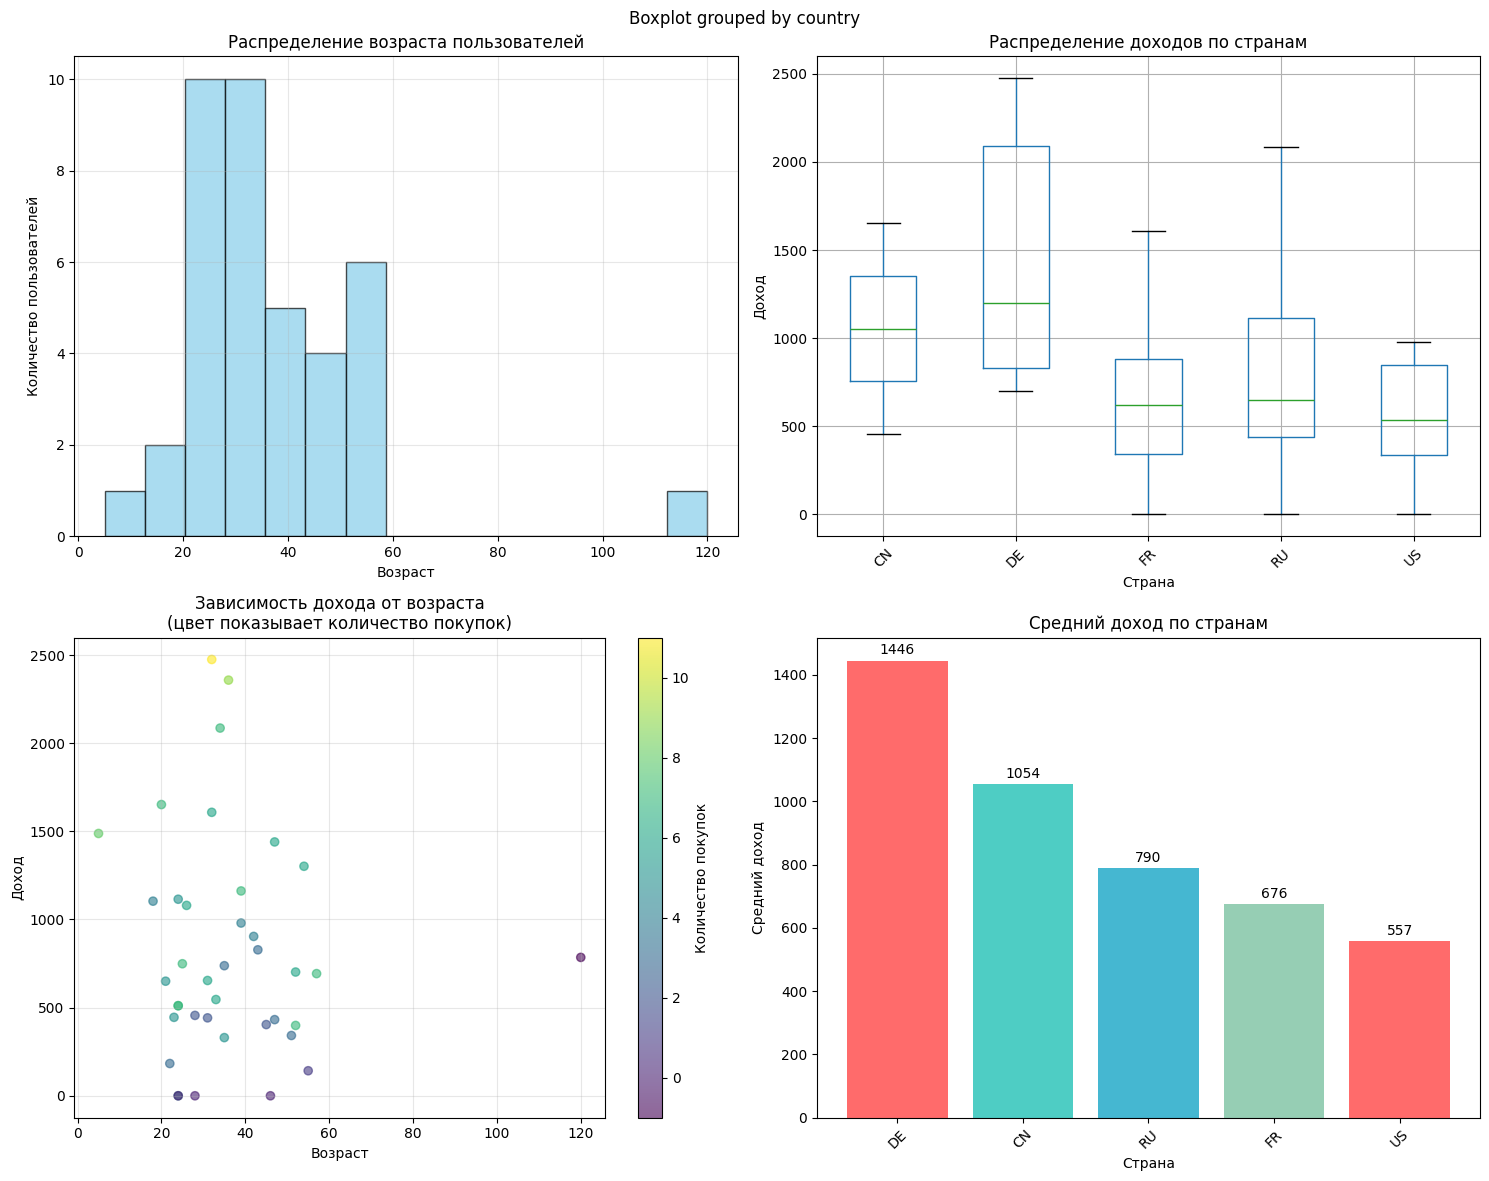

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

#гистограмма распределения возраста - показывает нормальное распределение пользователей по возрасту с пиком в районе 20-30 лет,
#что соответствует, видимо, целевой аудитории интернет-магазина.
axes[0, 0].hist(data['age'].dropna(), bins=15, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Возраст')
axes[0, 0].set_ylabel('Количество пользователей')
axes[0, 0].set_title('Распределение возраста пользователей')
axes[0, 0].grid(True, alpha=0.3)

#боксплот доходов по странам - удобен для сравнения медианных значений и разброса значений дохода.
data.boxplot(column='revenue', by='country', ax=axes[0, 1])
axes[0, 1].set_xlabel('Страна')
axes[0, 1].set_ylabel('Доход')
axes[0, 1].set_title('Распределение доходов по странам')
axes[0, 1].tick_params(axis='x', rotation=45)

#scatter plot - показывает корреляция между возрастом и доходом
scatter = axes[1, 0].scatter(data['age'], data['revenue'], 
                             c=data['purchases'], cmap='viridis', alpha=0.6)
axes[1, 0].set_xlabel('Возраст')
axes[1, 0].set_ylabel('Доход')
axes[1, 0].set_title('Зависимость дохода от возраста\n(цвет показывает количество покупок)')
axes[1, 0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 0], label='Количество покупок')

#столбчатая диаграмма - демонстрирует средний доход по странам
country_revenue = data.groupby('country')['revenue'].mean().sort_values(ascending=False)
bars = axes[1, 1].bar(country_revenue.index, country_revenue.values, 
                      color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[1, 1].set_xlabel('Страна')
axes[1, 1].set_ylabel('Средний доход')
axes[1, 1].set_title('Средний доход по странам')
axes[1, 1].tick_params(axis='x', rotation=45)

for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 10,
                   f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('figures/vizualizations.png', 
            dpi=300, bbox_inches='tight')
plt.show()